<a href="https://colab.research.google.com/github/Vinuboi321/SBALoanApprovalMachineLearningProject/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install --upgrade xgboost scikit-learn

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statistics import mean, stdev
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree
from google.colab import drive


In [7]:
#Download of dataset, upload to runtime files to access
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/SBAnational.csv'

Mounted at /content/drive


In [8]:
#Looking at the data set to analyze
sba = pd.read_csv(file_path)
sba

<ipython-input-8-a3b0aa068714>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sba = pd.read_csv(file_path)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [9]:
# Check the columns
sba.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [10]:
# Check for any missing values
sba.isna().sum()

,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [11]:
#Dropping irrelavant columns and other data
#sba = sba.drop(columns=['City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'Term'])
sba = sba.drop(columns=['LoanNr_ChkDgt', 'City', 'State', 'Bank', 'BankState',
                        'ApprovalDate', 'ChgOffDate', 'ApprovalFY', 'Term', 'DisbursementDate', 'DisbursementGross' ])

#finalized dataframe that will be used
sba

,Name,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,47711,451120,4,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),46526,722410,2,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",47401,621210,7,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",74012,0,2,1.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",32801,0,14,1.0,7,7,1,0,N,N,$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,FABRIC FARMS,43221,451120,6,1.0,0,0,1,0,0,N,$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,FABRIC FARMS,43221,451130,6,1.0,0,0,1,0,Y,N,$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,"RADCO MANUFACTURING CO.,INC.",93455,332321,26,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,"MARUTAMA HAWAII, INC.",96830,0,6,1.0,0,0,1,0,N,Y,$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [12]:
sba.isna().sum()

,0
Name,14
Zip,0
NAICS,0
NoEmp,0
NewExist,136
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0
RevLineCr,4528


In [13]:
# removed all empty rows
sba = sba.dropna()
sba.isna().sum()

,0
Name,0
Zip,0
NAICS,0
NoEmp,0
NewExist,0
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0
RevLineCr,0


In [14]:
# Check for duplicate rows
sba.duplicated().sum()

833

In [15]:
# Removed all duplicate rows
sba.drop_duplicates()

,Name,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,47711,451120,4,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),46526,722410,2,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",47401,621210,7,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",74012,0,2,1.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",32801,0,14,1.0,7,7,1,0,N,N,$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,FABRIC FARMS,43221,451120,6,1.0,0,0,1,0,0,N,$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,FABRIC FARMS,43221,451130,6,1.0,0,0,1,0,Y,N,$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,"RADCO MANUFACTURING CO.,INC.",93455,332321,26,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,"MARUTAMA HAWAII, INC.",96830,0,6,1.0,0,0,1,0,N,Y,$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


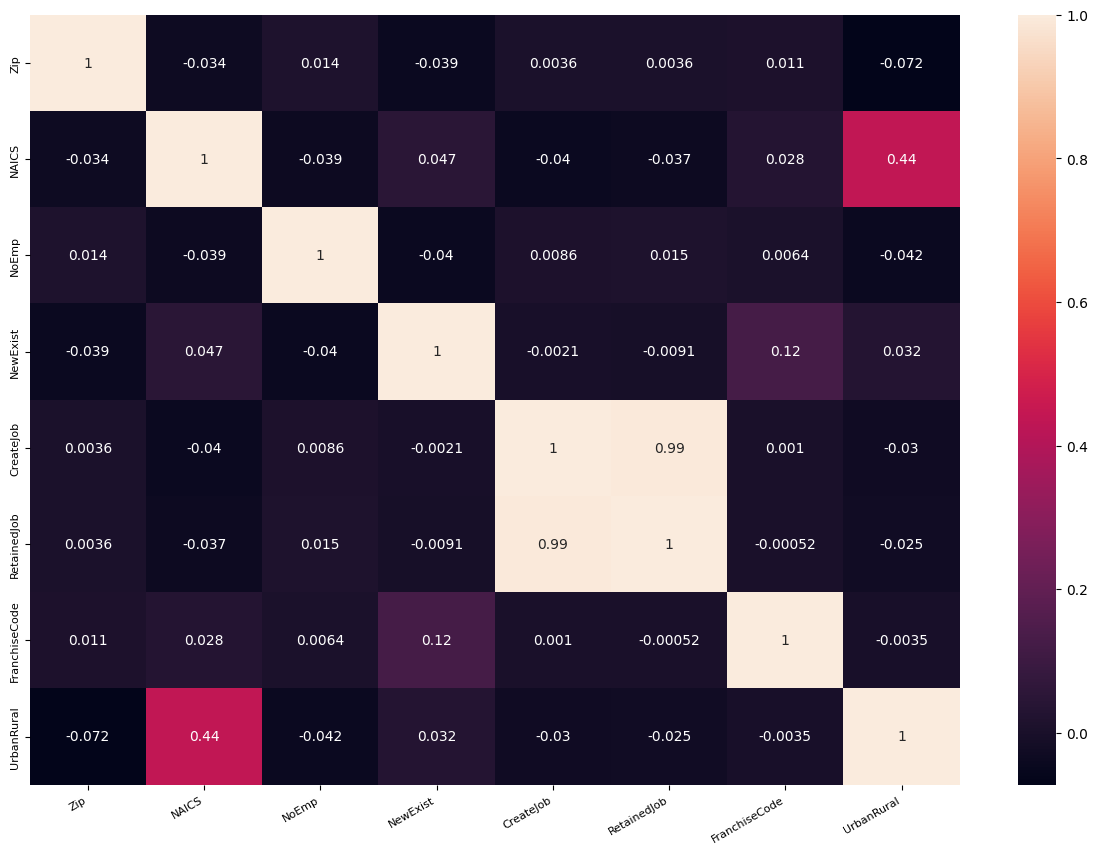

In [16]:
# Filter numeric columns
numeric_columns = sba.select_dtypes(include=['number'])

# Compute the correlation matrix on numeric columns
corr_matrix = numeric_columns.corr()

# Plot the heatmap
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()


In [17]:
#Spliting the dataset!
y = sba.MIS_Status
X = sba.drop(['MIS_Status'], axis = 1)
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.1,random_state = 25)

In [18]:
#finalized dataframe that we will use
sba

,Name,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,47711,451120,4,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),46526,722410,2,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",47401,621210,7,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",74012,0,2,1.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",32801,0,14,1.0,7,7,1,0,N,N,$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,FABRIC FARMS,43221,451120,6,1.0,0,0,1,0,0,N,$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,FABRIC FARMS,43221,451130,6,1.0,0,0,1,0,Y,N,$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,"RADCO MANUFACTURING CO.,INC.",93455,332321,26,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,"MARUTAMA HAWAII, INC.",96830,0,6,1.0,0,0,1,0,N,Y,$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [19]:
# Create a new column with the industry the NAICS code represents
sba['Industry'] = sba['NAICS'].astype('str').apply(lambda x: x[:2])
# Maps the approprate industry to each record based on the first two digits of the NAICS code
sba['Industry'] = sba['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
     '81': 'Other_no_pub',
    '92': 'Public_Admin'
})
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan
sba['Default'] = np.where(sba['MIS_Status'] == 'P I F', 0, 1)
sba['Default'].value_counts()

# Check Default percentage by Industry
sba_ind = sba.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
sba_ind['Def_Percent'] = sba_ind[1]/(sba_ind[1] + sba_ind[0])
sba_ind

<ipython-input-19-4075962d1e19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sba['Industry'] = sba['NAICS'].astype('str').apply(lambda x: x[:2])
<ipython-input-19-4075962d1e19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sba['Industry'] = sba['Industry'].map({
<ipython-input-19-4075962d1e19>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,52390,14799,0.220259
Admin_sup/Waste_Mgmt_Rem,24669,7584,0.235141
Ag/For/Fish/Hunt,8093,807,0.090674
Arts/Entertain/Rec,11508,2989,0.206181
Construction,50586,15335,0.232627
Educational,4811,1524,0.240568
Finance/Insurance,6754,2657,0.282329
Healthcare/Social_assist,49170,5686,0.103653
Information,8461,2793,0.248178


In [20]:
# Training the XG Boost model
X, y = make_classification(n_samples=1000, n_features=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)


XG Boost Accuracy Score: 0.95
XG Boost Model Score: 1.0
XG Boost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.96      0.94      0.95        54

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

XG Boost Confusion Matrix:


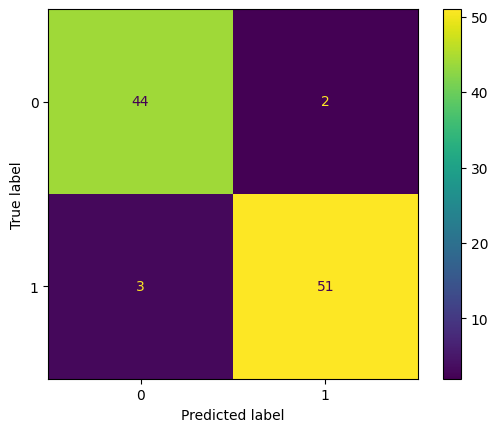

In [21]:
# Testing accuracy, and model score of XGBoost model
print(f'XG Boost Accuracy Score: {accuracy_score(y_test,xgb_y_pred)}')
print(f'XG Boost Model Score: {xgb_model.score(X_train, y_train)}')
print(f'XG Boost Classification Report:')
print(classification_report(y_test, xgb_y_pred))
#Forming Confusion Matrix
print(f'XG Boost Confusion Matrix:')
cm = confusion_matrix(y_test, xgb_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [25]:
from sklearn.metrics import accuracy_score
import numpy as np

def custom_cross_val_score(model, X, y, cv=5):
    """
    Custom implementation of cross-validation.

    Parameters:
    - model: The model to evaluate (must implement fit and predict).
    - X: Feature matrix.
    - y: Target vector.
    - cv: Number of cross-validation folds (default is 5).

    Returns:
    - scores: A list of accuracy scores for each fold.
    """
    # Shuffle and split the data
    indices = np.arange(len(X))
    np.random.seed(42)  # For reproducibility
    np.random.shuffle(indices)

    fold_size = len(X) // cv
    scores = []

    for fold in range(cv):
        # Define the test fold
        start = fold * fold_size
        end = (fold + 1) * fold_size if fold < cv - 1 else len(X)
        test_indices = indices[start:end]
        train_indices = np.setdiff1d(indices, test_indices)

        # Split the data
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    return scores


In [27]:
### Cross validation score for XG Boost
# Obtain cross-validation score

xgb_cvs = custom_cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {xgb_cvs}")
print(f"Average CV Score: {mean(xgb_cvs):.2f}")

Cross-Validation Scores: [0.9333333333333333, 0.9444444444444444, 0.95, 0.9444444444444444, 0.9666666666666667]
Average CV Score: 0.95


In [31]:
# Defined XGBoost classifier
classifier = xgb.XGBClassifier()

# Number of folds for stratified cross-validation
n_splits = 5

# Instance of StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = custom_cross_val_score(classifier, X_train, y_train, cv=10)

print("Cross-validation scores:", cross_val_scores)

# Train XGBoost classifier on the entire training set
classifier.fit(X_train, y_train)

# Evaluate XGBoost classifier on the test set
test_accuracy = classifier.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Cross-validation scores: [0.9555555555555556, 0.9444444444444444, 0.9555555555555556, 0.9333333333333333, 0.9444444444444444, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]
Test set accuracy: 0.95


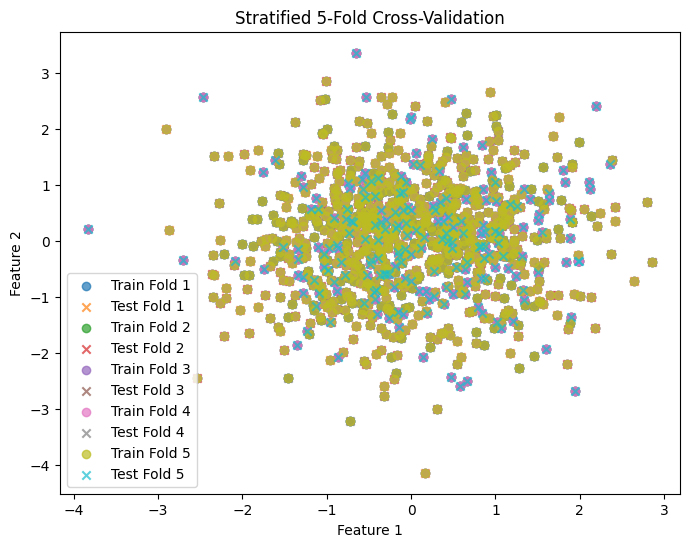

In [32]:
#Plotting the folds
fig, ax = plt.subplots(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    # Plot training points
    ax.scatter(X[train_index, 0], X[train_index, 1], label=f'Train Fold {i + 1}', alpha=0.7)

    # Plot testing points
    ax.scatter(X[test_index, 0], X[test_index, 1], label=f'Test Fold {i + 1}', marker='x', alpha=0.7)

# Customize plot
ax.set_title(f'Stratified {n_splits}-Fold Cross-Validation')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

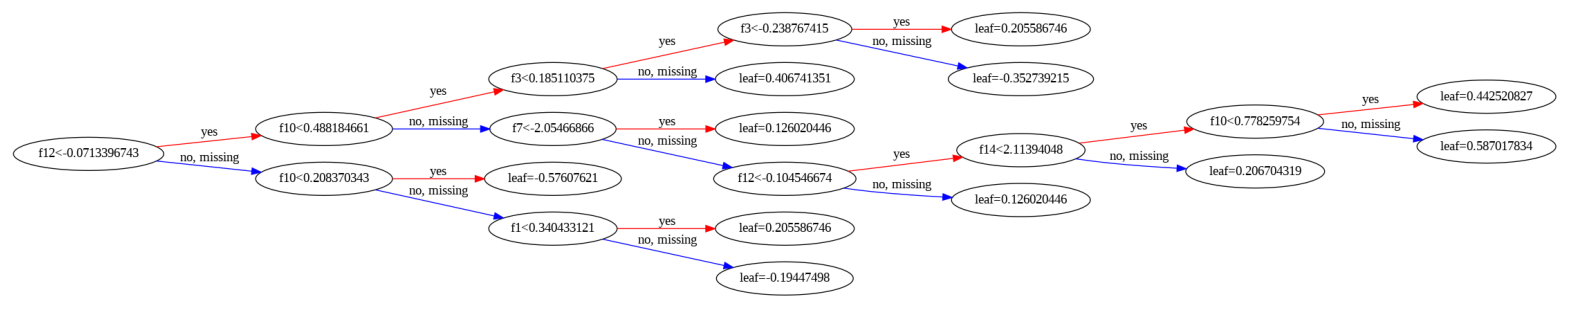

In [45]:
#XGBOOST graph model
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(xgb_model.get_booster(), num_trees=0, rankdir='LR', ax=ax)
plt.show()

In [34]:
#import module
from sklearn.ensemble import RandomForestClassifier

In [35]:
### Train your Random Forest model below
rf = RandomForestClassifier(max_depth=None, n_estimators=50, max_features=5, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

Random Forest Accuracy Score: 0.96
Random Forest Model Score: 0.9988888888888889
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.96      0.96      0.96        54

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

Random Forest Confusion Matrix:


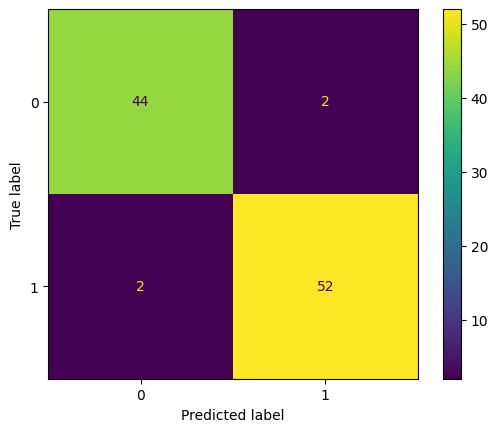

In [36]:
# Testing accuracy of Random Forest model
print(f'Random Forest Accuracy Score: {accuracy_score(y_test,rf_y_pred)}')
print(f'Random Forest Model Score: {rf.score(X_train, y_train)}')
print(f'Random Forest Classification Report:')
print(classification_report(y_test, rf_y_pred))
print(f'Random Forest Confusion Matrix:')
cm = confusion_matrix(y_test, rf_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [37]:
### Cross validation score for Random Forest
rf_cvs = custom_cross_val_score(rf, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {rf_cvs}")
print(f"Average CV Score: {mean(rf_cvs):.2f}")

Cross-Validation Scores: [0.9444444444444444, 0.95, 0.9611111111111111, 0.9555555555555556, 0.9611111111111111]
Average CV Score: 0.95


In [39]:
# Defined Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Number of folds for stratified cross-validation
n_splits = 5

# Instance of StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = custom_cross_val_score(classifier, X_train, y_train, cv=10)

print("Cross-validation scores:", cross_val_scores)

# Train Random Forest classifier on the entire training set
classifier.fit(X_train, y_train)

# Evaluate Random Forest classifier on the test set
test_accuracy = classifier.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Cross-validation scores: [0.9444444444444444, 0.9444444444444444, 0.9666666666666667, 0.9333333333333333, 0.9555555555555556, 0.9666666666666667, 0.9555555555555556, 0.9666666666666667, 0.9666666666666667, 0.9555555555555556]
Test set accuracy: 0.96


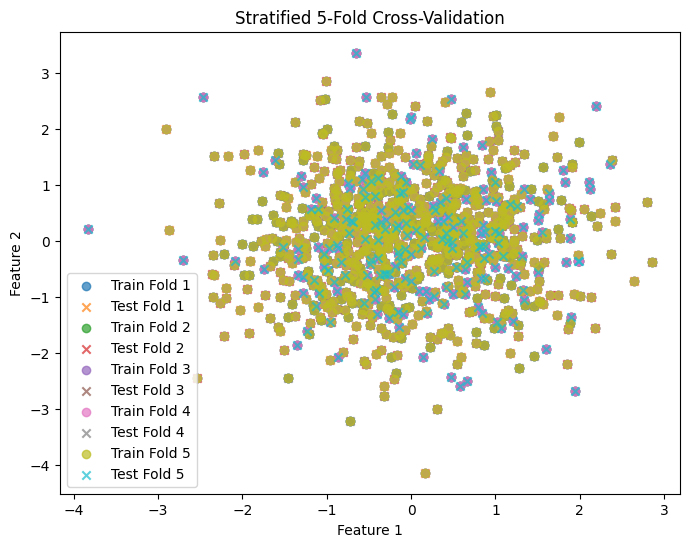

In [40]:
#Plotting the folds
fig, ax = plt.subplots(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    # Plot training points
    ax.scatter(X[train_index, 0], X[train_index, 1], label=f'Train Fold {i + 1}', alpha=0.7)

    # Plot testing points
    ax.scatter(X[test_index, 0], X[test_index, 1], label=f'Test Fold {i + 1}', marker='x', alpha=0.7)

# Customize plot
ax.set_title(f'Stratified {n_splits}-Fold Cross-Validation')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()

In [41]:
#import module
from sklearn.neighbors import KNeighborsClassifier

In [42]:
### Trained k-NN  model below
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

k-NN Accuracy Score: 0.91
k-NN Model Score: 0.9288888888888889
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        46
           1       0.88      0.96      0.92        54

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

k-NN Confusion Matrix:


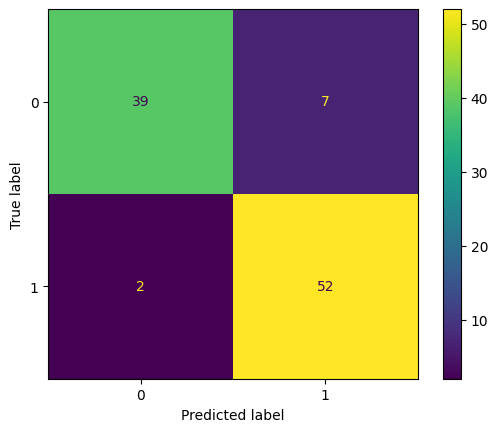

In [43]:
# Testing accuracy, and model score of k-NN model
print(f'k-NN Accuracy Score: {accuracy_score(y_test,knn_y_pred)}')
print(f'k-NN Model Score: {knn.score(X_train, y_train)}')
print(f'k-NN Classification Report:')
print(classification_report(y_test, knn_y_pred))
#Confusin Matrix of knn model
print(f'k-NN Confusion Matrix:')
cm = confusion_matrix(y_test, knn_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [44]:
### Cross validation score for knn
knn_cvs = custom_cross_val_score(knn, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {knn_cvs}")
print(f"Average CV Score: {mean(knn_cvs):.2f}")


Cross-Validation Scores: [0.9055555555555556, 0.9166666666666666, 0.8888888888888888, 0.9166666666666666, 0.9166666666666666]
Average CV Score: 0.91


In [46]:
# Defined k-NN classifier
knn = KNeighborsClassifier(n_neighbors=15)

# Number of folds for stratified cross-validation
n_splits = 5

# Instance of StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(knn, X_train, y_train, cv=stratified_kfold)

print("Cross-validation scores:", cross_val_scores)

# Train k-NN classifier on the entire training set
knn.fit(X_train, y_train)

# Evaluate k-NN classifier on the test set
test_accuracy = knn.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Cross-validation scores: [0.87222222 0.92777778 0.86666667 0.92777778 0.91666667]
Test set accuracy: 0.91


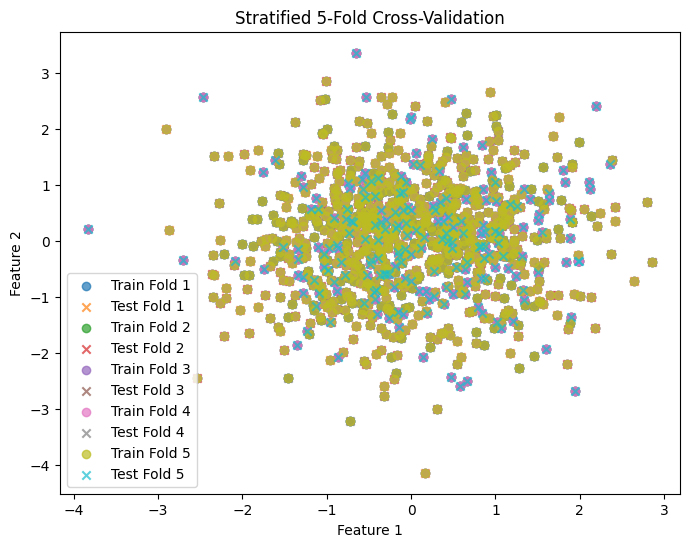

In [47]:
#Plotting the folds
fig, ax = plt.subplots(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    # Plot training points
    ax.scatter(X[train_index, 0], X[train_index, 1], label=f'Train Fold {i + 1}', alpha=0.7)

    # Plot testing points
    ax.scatter(X[test_index, 0], X[test_index, 1], label=f'Test Fold {i + 1}', marker='x', alpha=0.7)

# Customize plot
ax.set_title(f'Stratified {n_splits}-Fold Cross-Validation')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()